In [ ]:
import pandas as pd

In [ ]:
data= pd.read_csv('/content/BBC News Train.csv')

In [ ]:
#Data exploration

In [ ]:
#what is in the data?
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [ ]:
data['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [ ]:
data.shape

(1490, 3)

In [ ]:
data.isnull().any()

ArticleId    False
Text         False
Category     False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [ ]:
#predict whether a person is having a diabetes or not?
#Target - 0 | 1

#data - 1000 data points
# f1, f2, target (0 or 1)

# 900 - 0
# 100 - 1

# Data is heavily imbalanced

# 500- 0
# 500 - 1
# Data is balanced


# 450-0
# 550 - 1
# data is slighly imbalanced

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


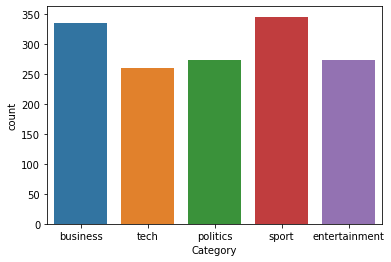

In [ ]:
sns.countplot(data['Category'])

In [ ]:
#drop Article Id
data=data.drop('ArticleId',axis=1)

In [ ]:
#Length of text column
data['text_length']=data['Text'].str.len()
data.head()

,Text,Category,text_length
0,worldcom ex-boss launches defence lawyers defe...,business,1866
1,german business confidence slides german busin...,business,2016
2,bbc poll indicates economic gloom citizens in ...,business,3104
3,lifestyle governs mobile choice faster bett...,tech,3618
4,enron bosses in $168m payout eighteen former e...,business,2190


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


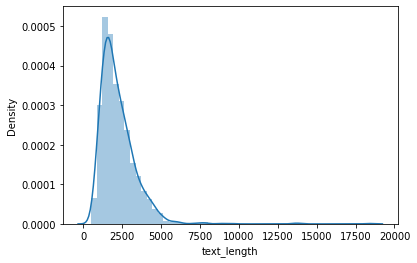

In [ ]:
sns.distplot(data['text_length'])

In [ ]:
#Construct wordcloud

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

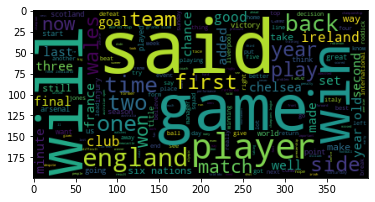

In [ ]:
#wordcloud for category - sport
#extract all text according to corresponding sport category
temp_df=data[data['Category']=="sport"]
sport_sentences=temp_df['Text'].tolist()
sport_sentences=" ".join(sport_sentences)

wordcloud=WordCloud().generate(sport_sentences)
plt.imshow(wordcloud)

#Data preprocessing or cleaning of data

#REmove stopwords
#Make all words normalized (make it lower)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
mystopwords=set(stopwords.words('english'))
print(mystopwords)

{'of', "shouldn't", 'have', 'up', "hasn't", "wasn't", 've', 'didn', 'until', 'why', 'no', "that'll", 'if', 'below', "weren't", 'hadn', "you'd", 'both', 'what', 'on', 'at', 'them', 'too', 'very', 's', 'my', 'not', 'before', 'wasn', "mustn't", 'do', 'any', 'll', 'i', 'they', 'don', 'these', 'down', 'again', 'has', 'aren', 'your', 're', 'him', 'when', 'as', 'itself', 'because', "mightn't", 'themselves', 'such', 'further', "aren't", 'm', 'being', 'here', 'are', 'once', "couldn't", 'haven', 'herself', 'me', 'each', 'shan', 'be', 'yours', 'same', 'theirs', 'all', 'about', 'those', 'where', 'most', 'against', 'nor', 'and', 'during', 'mightn', 'by', 'just', 'her', 'is', 'than', 'you', 'ain', 'hasn', 'under', "hadn't", 'mustn', "you're", 'yourself', 'his', 'won', 'he', "she's", "wouldn't", 'now', "doesn't", "haven't", 'shouldn', "don't", 'she', 'himself', 'can', "you'll", "needn't", 'which', 'off', 'only', "should've", 'there', 'having', 'through', 'doesn', 'weren', 'our', 'their', "won't", 'to

In [ ]:
def pre_process_text(text):
  text=text.lower()
  mystopwords=set(stopwords.words('english'))
  word_tokenize_output=word_tokenize(text)

  temp_word_list=[]

  for each_word in word_tokenize_output:
      if each_word in mystopwords:
        pass
      else:
        temp_word_list.append(each_word)
  temp_word_list=" ".join(temp_word_list)
  return temp_word_list

In [ ]:
sentence="I like Machine Learning but i also like programming"
filtered_sentence=pre_process_text(sentence)
filtered_sentence

'like machine learning also like programming'

In [ ]:
data.head()

,Text,Category,text_length
0,worldcom ex-boss launches defence lawyers defe...,business,1866
1,german business confidence slides german busin...,business,2016
2,bbc poll indicates economic gloom citizens in ...,business,3104
3,lifestyle governs mobile choice faster bett...,tech,3618
4,enron bosses in $168m payout eighteen former e...,business,2190


In [ ]:
data['cleaned_text']=data['Text'].apply(pre_process_text)

In [ ]:
data.head()

,Text,Category,text_length,cleaned_text
0,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom ex-boss launches defence lawyers defe...
1,german business confidence slides german busin...,business,2016,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...
3,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...
4,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses $ 168m payout eighteen former enr...


In [ ]:
new_data=data[['cleaned_text','Category']]
new_data.isnull().any()

cleaned_text    False
Category        False
dtype: bool

#LABEL ENCODING for Target Column(Category)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
new_data['target']=label_encoder.fit_transform(new_data['Category'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
new_data.head()

,cleaned_text,Category,target
0,worldcom ex-boss launches defence lawyers defe...,business,0
1,german business confidence slides german busin...,business,0
2,bbc poll indicates economic gloom citizens maj...,business,0
3,lifestyle governs mobile choice faster better ...,tech,4
4,enron bosses $ 168m payout eighteen former enr...,business,0


In [ ]:
new_data=new_data[['cleaned_text','target']]
new_data.head()

,cleaned_text,target
0,worldcom ex-boss launches defence lawyers defe...,0
1,german business confidence slides german busin...,0
2,bbc poll indicates economic gloom citizens maj...,0
3,lifestyle governs mobile choice faster better ...,4
4,enron bosses $ 168m payout eighteen former enr...,0


#Split data in trainng and testing
```



In [ ]:
from sklearn.model_selection import train_test_split

features=new_data['cleaned_text']
target=new_data['target']

x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=35)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1117,)
(1117,)
(373,)
(373,)


In [ ]:
x_train

1030    rusedski angry supplements greg rusedski criti...
834     consumers drive french economy france economic...
449     industrial revival hope japan japanese industr...
745     search wars hit desktop pcs another front on-g...
942     microsoft sets sights spyware windows users co...
                              ...                        
959     portishead back eight years cult british group...
1004    ferguson puts faith youngsters manchester unit...
1057    minimum wage increased £5.05 minimum wage rise...
951     comic book genius stan lee stan lee man respon...
1295    wine comedy six film gongs sideways wine-tasti...
Name: cleaned_text, Length: 1117, dtype: object

#Apply TF-IDF Vectorization on x_train and x_test

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

features_train = tfidf.fit_transform(x_train).toarray()
features_test = tfidf.fit_transform(x_test).toarray()

#Building Models

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. K-NN
5. Naive Bayes

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(features_train,y_train)
predictions=model.predict(features_test)

print(classification_report(y_test,predictions))

ValueError: ignored